### **3: Import Data and Required Packages**

In this section, we will import the necessary libraries to analyze the data. The required libraries include:

- **Pandas:** For data manipulation and analysis.
- **NumPy:** For numerical operations.
- **Matplotlib:** For data visualization.
- **Seaborn:** For statistical data visualization.
- **Warnings Library:** To suppress warnings during the execution of the code.


In [1]:
import os

In [2]:
%pwd

'f:\\Customer-Churn-Prediction-With-ANN\\notebook'

In [3]:
%pwd

'f:\\Customer-Churn-Prediction-With-ANN\\notebook'

In [4]:
os.chdir("../")

In [5]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('notebook\data\Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.shape

(10000, 11)

In [10]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

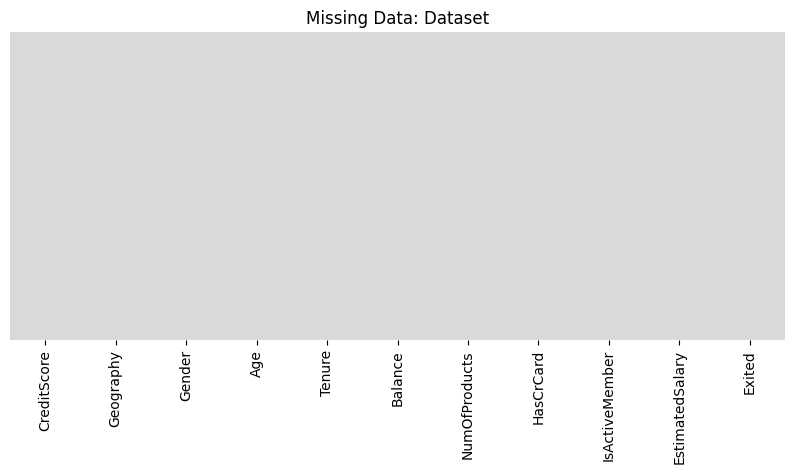

In [11]:

# Heatmap for missing data
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20c_r')
plt.title('Missing Data: Dataset')
plt.show()

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [15]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### **Printing Unique Categories for Multiple Columns**
In this section, we will print the unique categories present in several columns of the Customer Churn dataset. This will help us understand the diversity of the data.

In [16]:
print("Unique categories in Customer Churn data:")

# Loop through each specified column to print its unique values
for column in ["Geography", 'Gender']:
    # Print the unique categories found in the current colum
    print(f"Categories in column '{column}': {df[column].unique()}")

Unique categories in Customer Churn data:
Categories in column 'Geography': ['France' 'Spain' 'Germany']
Categories in column 'Gender': ['Female' 'Male']


### **Define Numerical and Categorical Columns**
In this section, we will separate the numerical and categorical features of the dataset. This helps us understand which columns contain numeric data and which ones contain categorical data, making it easier to apply the appropriate transformations later.

In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

We have 2 categorical features : ['Geography', 'Gender']


### **Calculating the Averages of Multiple Columns**
In this section, we calculate the average values for several numerical columns 

In [18]:
 #Calculate the averages for multiple columns
average_values = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].mean()

# Print the results with column names
print("Averages of the dataset columns:")
for column, value in average_values.items():
    print(f"Average {column}: {value}")

Averages of the dataset columns:
Average CreditScore: 650.5288
Average Age: 38.9218
Average Tenure: 5.0128
Average Balance: 76485.889288
Average NumOfProducts: 1.5302
Average HasCrCard: 0.7055
Average IsActiveMember: 0.5151
Average EstimatedSalary: 100090.239881
Average Exited: 0.2037


### **Visualizing the Distribution of Numerical Columns**
We will visualize the following columns from the dataset:

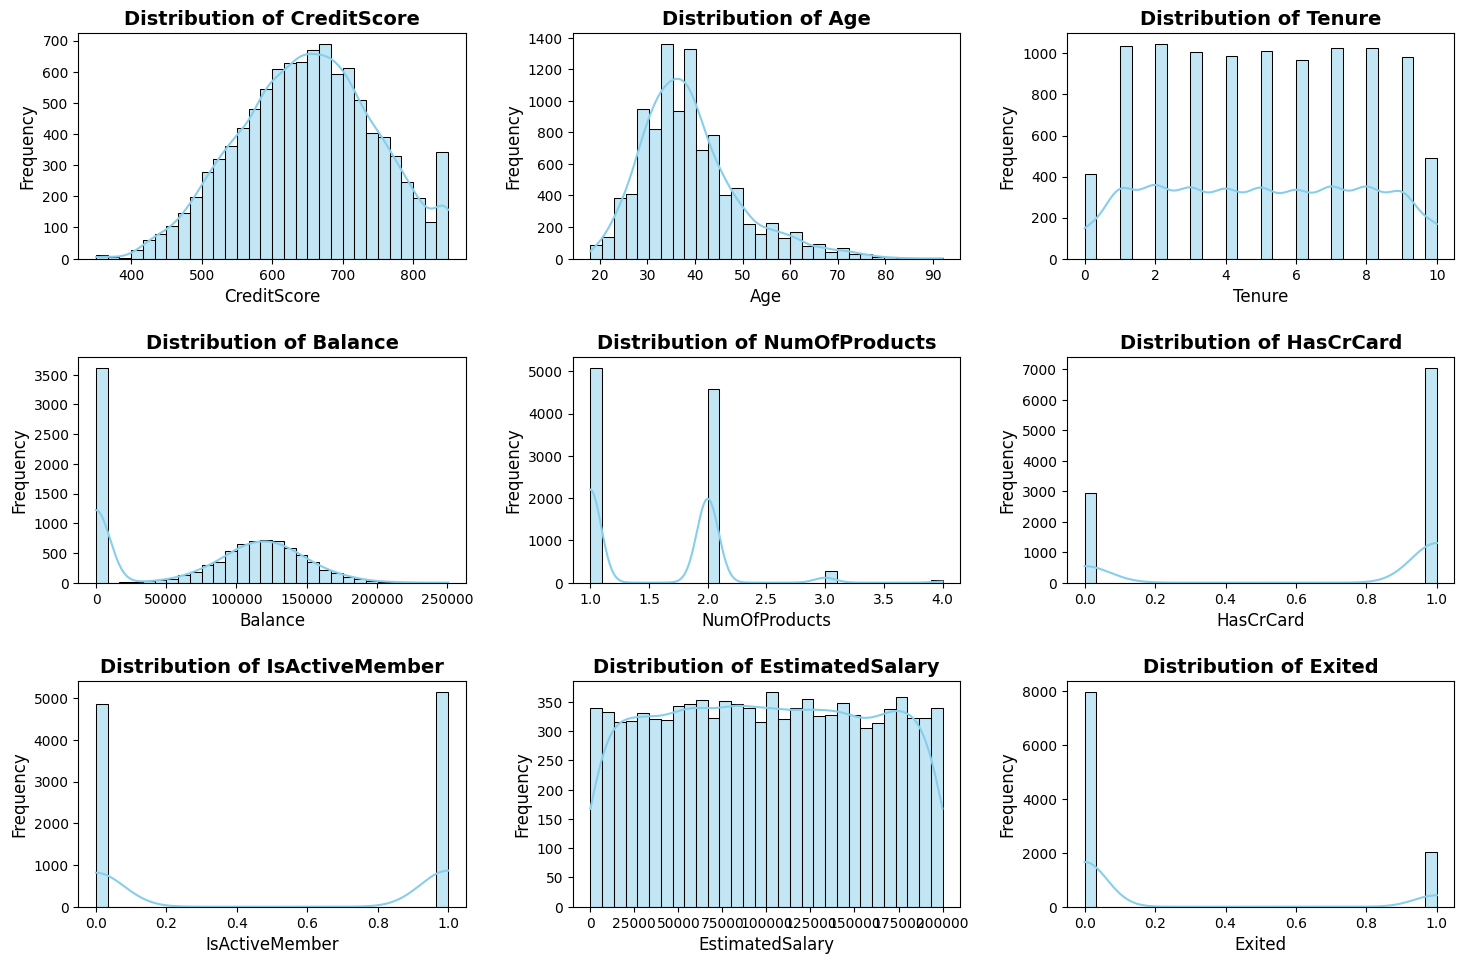

In [19]:
# List of columns to visualize
columns_to_visualize = [
    'CreditScore', 'Age', 'Tenure', 'Balance',
    'NumOfProducts', 'HasCrCard', 'IsActiveMember',
    'EstimatedSalary', 'Exited'
]

# Set up the figure with a 3x3 grid for subplots
plt.figure(figsize=(15, 10))

# Loop through each column and plot its distribution with both histogram and KDE
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)  # Arrange subplots in 3 rows x 3 columns
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black', bins=30)
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust layout to prevent overlapping elements and display the plot
plt.tight_layout(pad=2.0)
plt.show()

### Visualizing the Distribution of Categorical Columns

We will visualize the following categorical columns from the dataset:

- **Geography**
- **Gender**

For each column, we will create count plots to show the number of occurrences of each category.


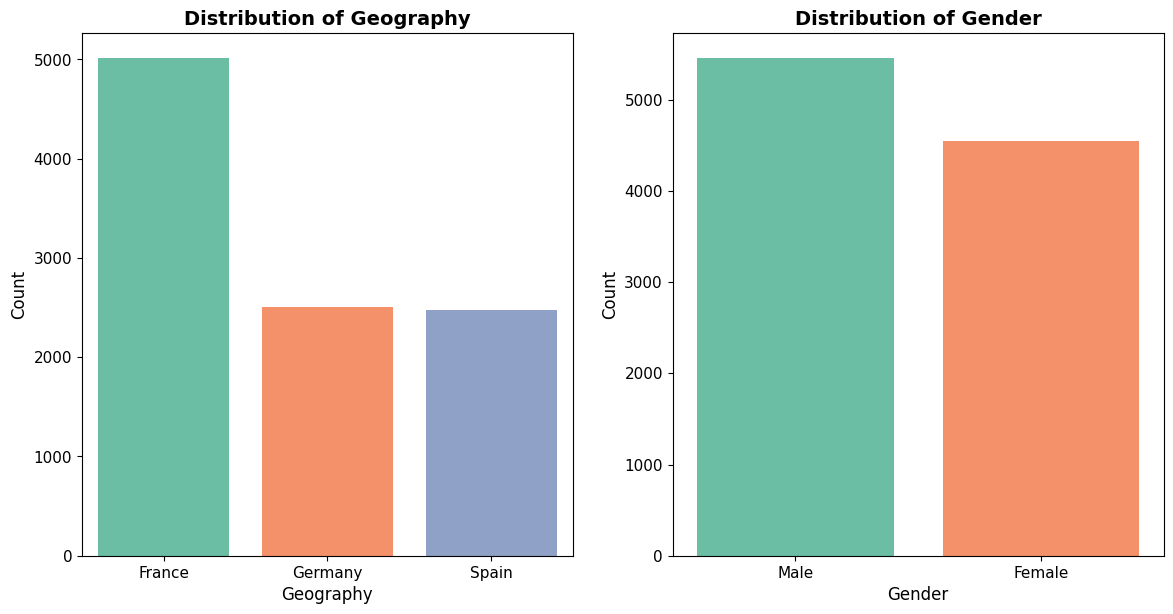

In [20]:
# List of categorical columns to visualize
categorical_columns = ["Geography", "Gender"]

# Set up the figure for subplots with an appropriate size
plt.figure(figsize=(18, 12))

# Loop through each categorical column and plot its distribution
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)  # Arrange subplots in a grid (2 rows, 3 columns)
    sns.countplot(
        x=df[column],
        order=df[column].value_counts().index,
        palette='Set2',
        saturation=0.9
    )
    plt.title(f'Distribution of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)

# Adjust layout and display the plot
plt.tight_layout(pad=2.0)
plt.show()

### Visualizing the Distribution of Numerical Features Using Violin Plots

In this section, we will use violin plots to visualize the distribution of numerical features in our dataset. Violin plots combine a box plot with a kernel density plot, providing insights into the distribution's shape, central tendency, and variability.


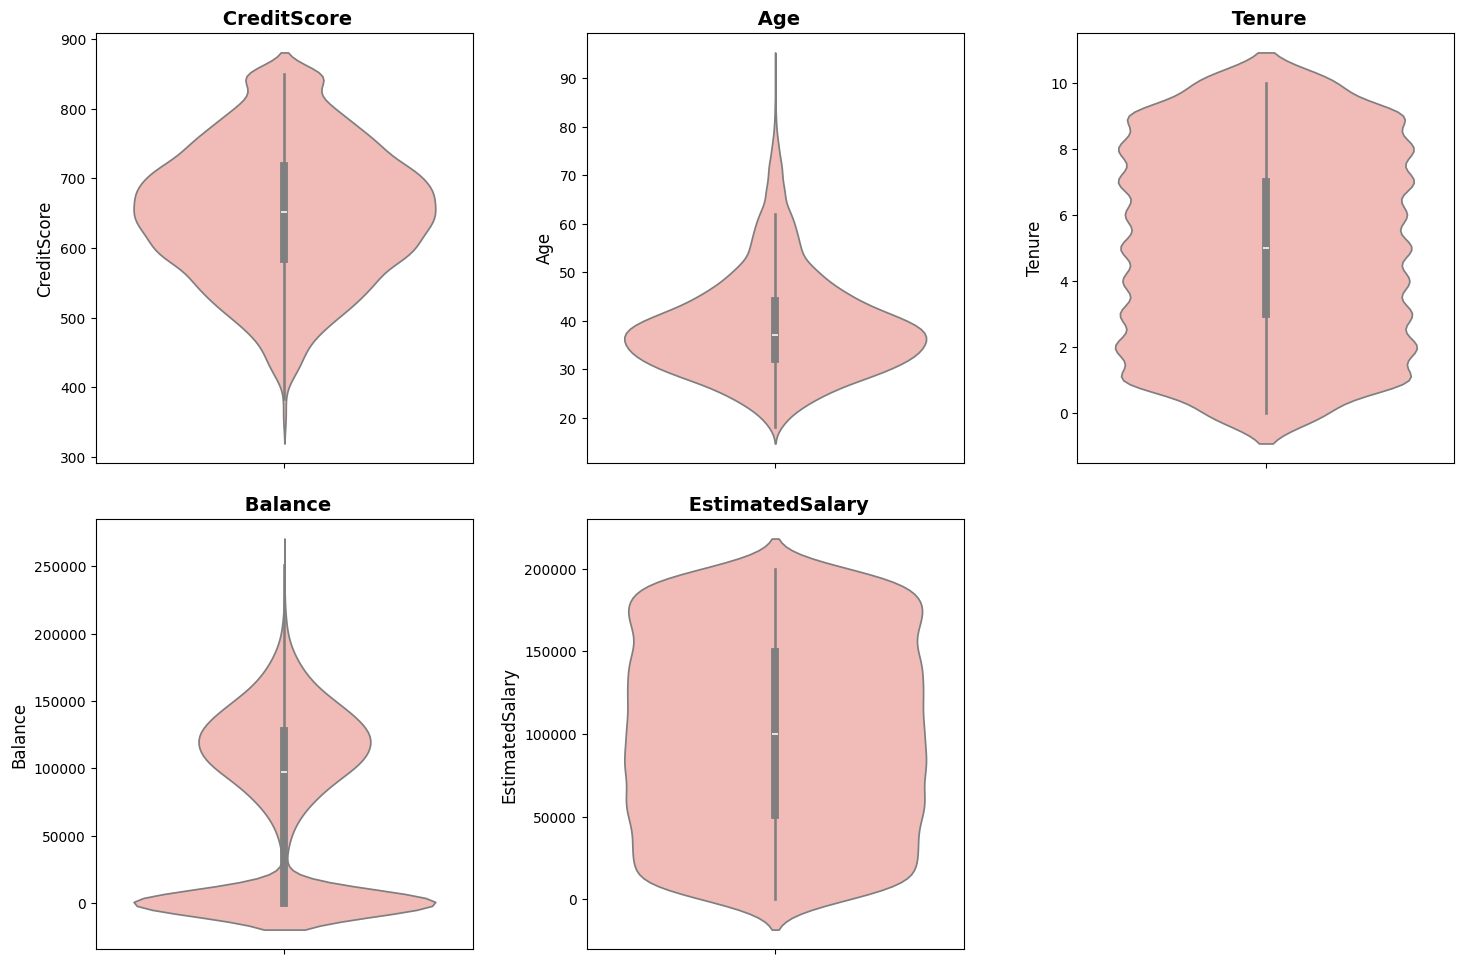

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to visualize
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Loop through each numerical column and plot a violin plot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(y=df[column], palette='Pastel1')
    plt.title(f' {column}', fontsize=14, fontweight='bold')
    plt.xlabel('')  # Remove x-label since it's not necessary
    plt.ylabel(column, fontsize=12)

# Adjust layout and show the plot
plt.tight_layout(pad=2.0)
plt.show()


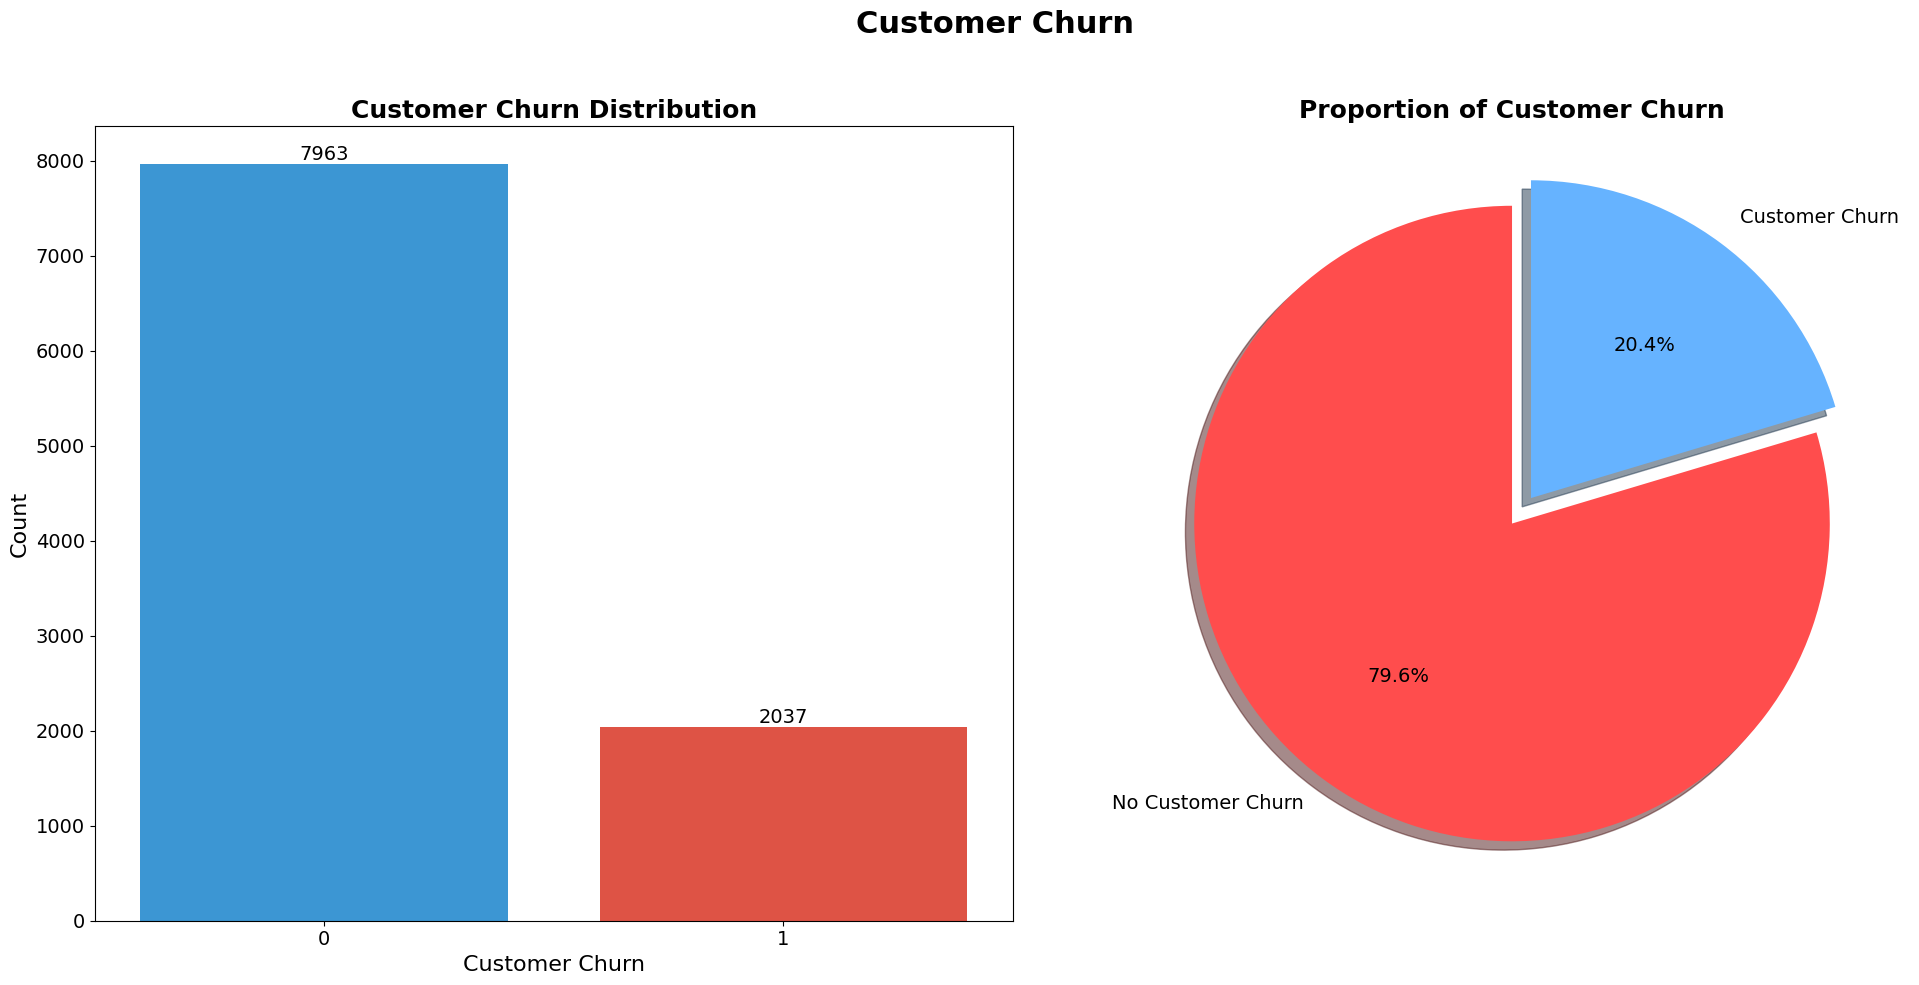

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a subplot for heart disease condition visualization
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Set the overall figure title
f.suptitle('Customer Churn', fontsize=22, fontweight='bold', y=0.98)

# Count plot for the 'HeartDisease' variable
sns.countplot(
    x=df['Exited'], 
    data=df, 
    palette=['#3498db', '#e74c3c'], 
    ax=ax[0], 
    saturation=0.9
)
# Adding labels to each bar in the count plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)

# Setting the title and axis labels for the count plot
ax[0].set_title('Customer Churn Distribution', fontsize=18, fontweight='bold')
ax[0].set_xlabel('Customer Churn', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

# Pie chart for the 'HeartDisease' variable
plt.subplot(122)
plt.pie(
    x=df['Exited'].value_counts(), 
    labels=['No Customer Churn', 'Customer Churn'], 
    explode=[0, 0.1],         # Slightly separate the 'Heart Disease' slice
    autopct='%1.1f%%', 
    shadow=True, 
    colors=['#ff4d4d', '#66b3ff'], 
    startangle=90, 
    textprops={'fontsize': 14}
)
plt.title('Proportion of Customer Churn', fontsize=18, fontweight='bold')

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


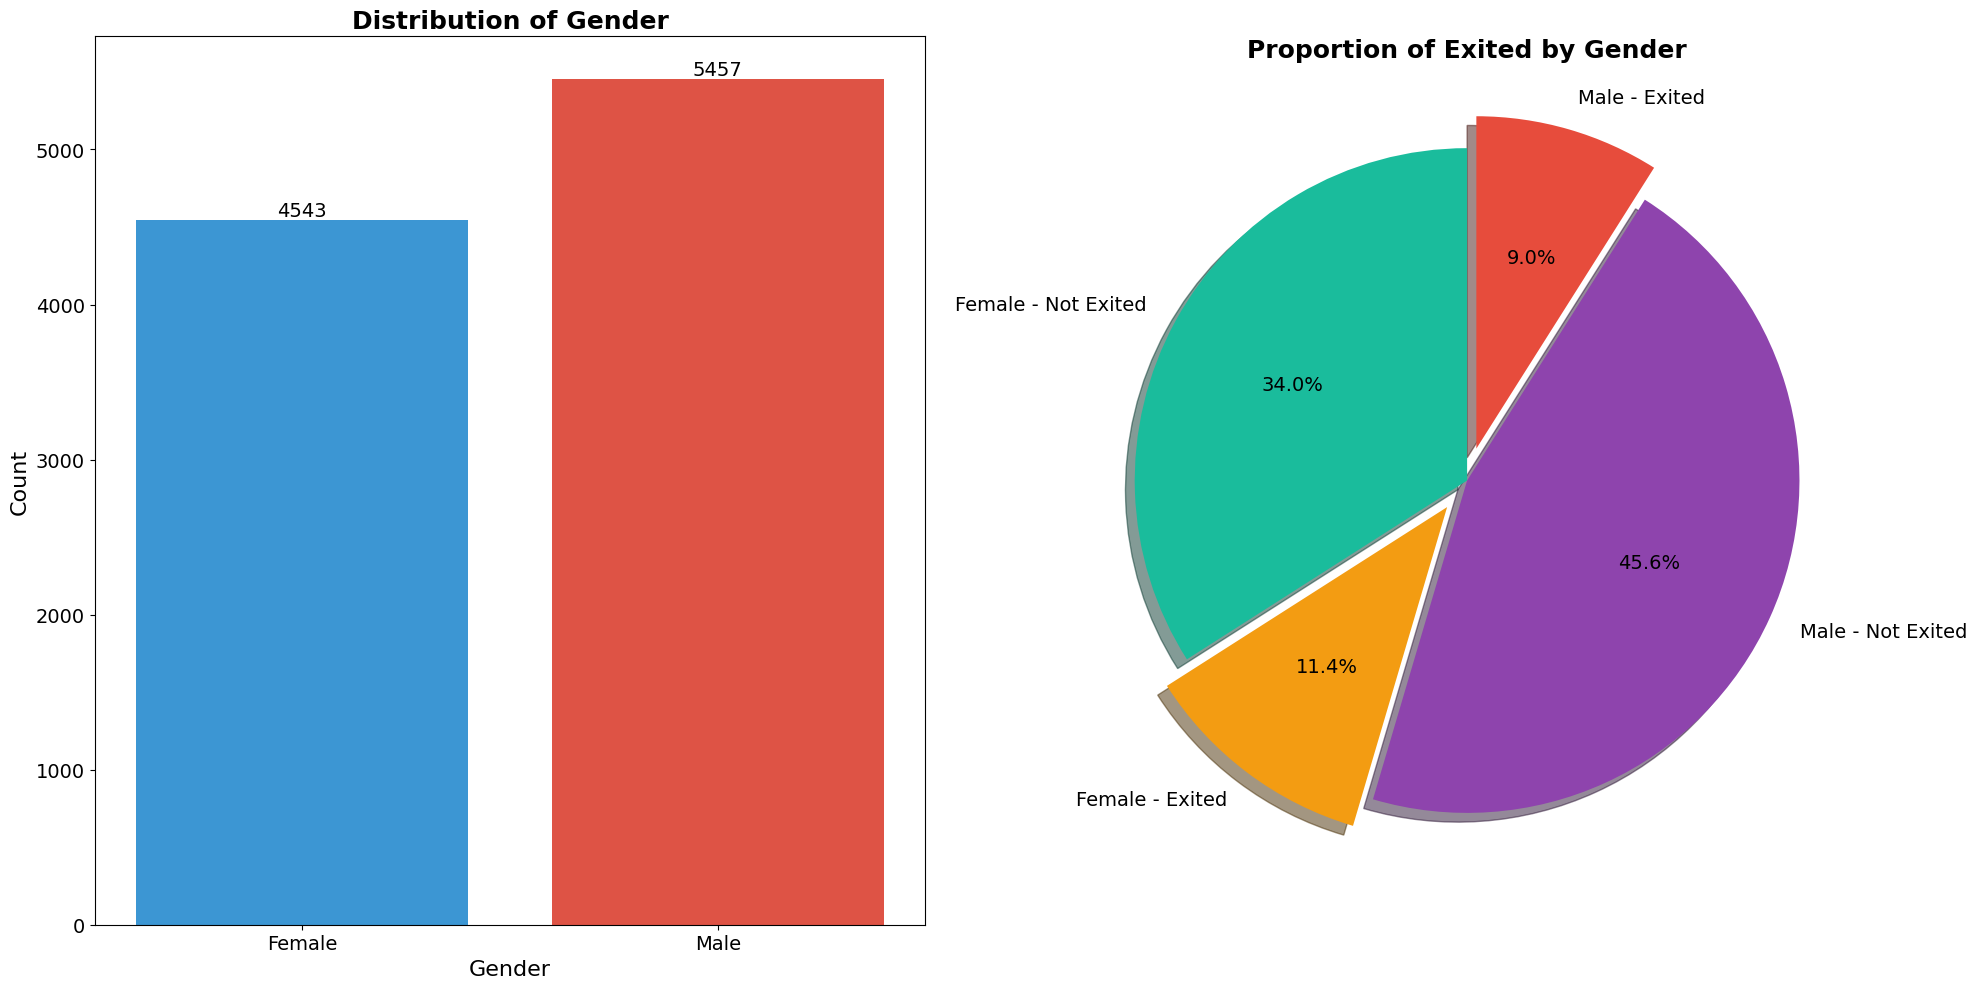

In [23]:
# Create subplots for the visualizations
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for the 'Gender' variable
sns.countplot(x=df['Gender'], data=df, palette=['#3498db', '#e74c3c'], ax=ax[0], saturation=0.9)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)
ax[0].set_title('Distribution of Gender', fontsize=18, fontweight='bold')
ax[0].set_xlabel('Gender', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

# Prepare data for the pie chart: grouping by 'Gender' and 'Exited'
exited_counts = df.groupby('Gender')['Exited'].value_counts().unstack()

# Create labels and explode settings for the pie chart
labels = [f'{gender} - {"Exited" if exited == 1 else "Not Exited"}'
          for gender in exited_counts.index 
          for exited in exited_counts.columns]
explode = [0.1 if exited == 1 else 0 
           for _ in exited_counts.index 
           for exited in exited_counts.columns]

# Pie chart for the 'Exited' variable segmented by 'Gender'
ax[1].pie(
    exited_counts.values.flatten(), 
    labels=labels,
    explode=explode,
    autopct='%1.1f%%',
    shadow=True,
    colors=['#1abc9c', '#f39c12', '#8e44ad', '#e74c3c'],
    startangle=90,
    textprops={'fontsize': 14}
)
ax[1].set_title('Proportion of Exited by Gender', fontsize=18, fontweight='bold')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

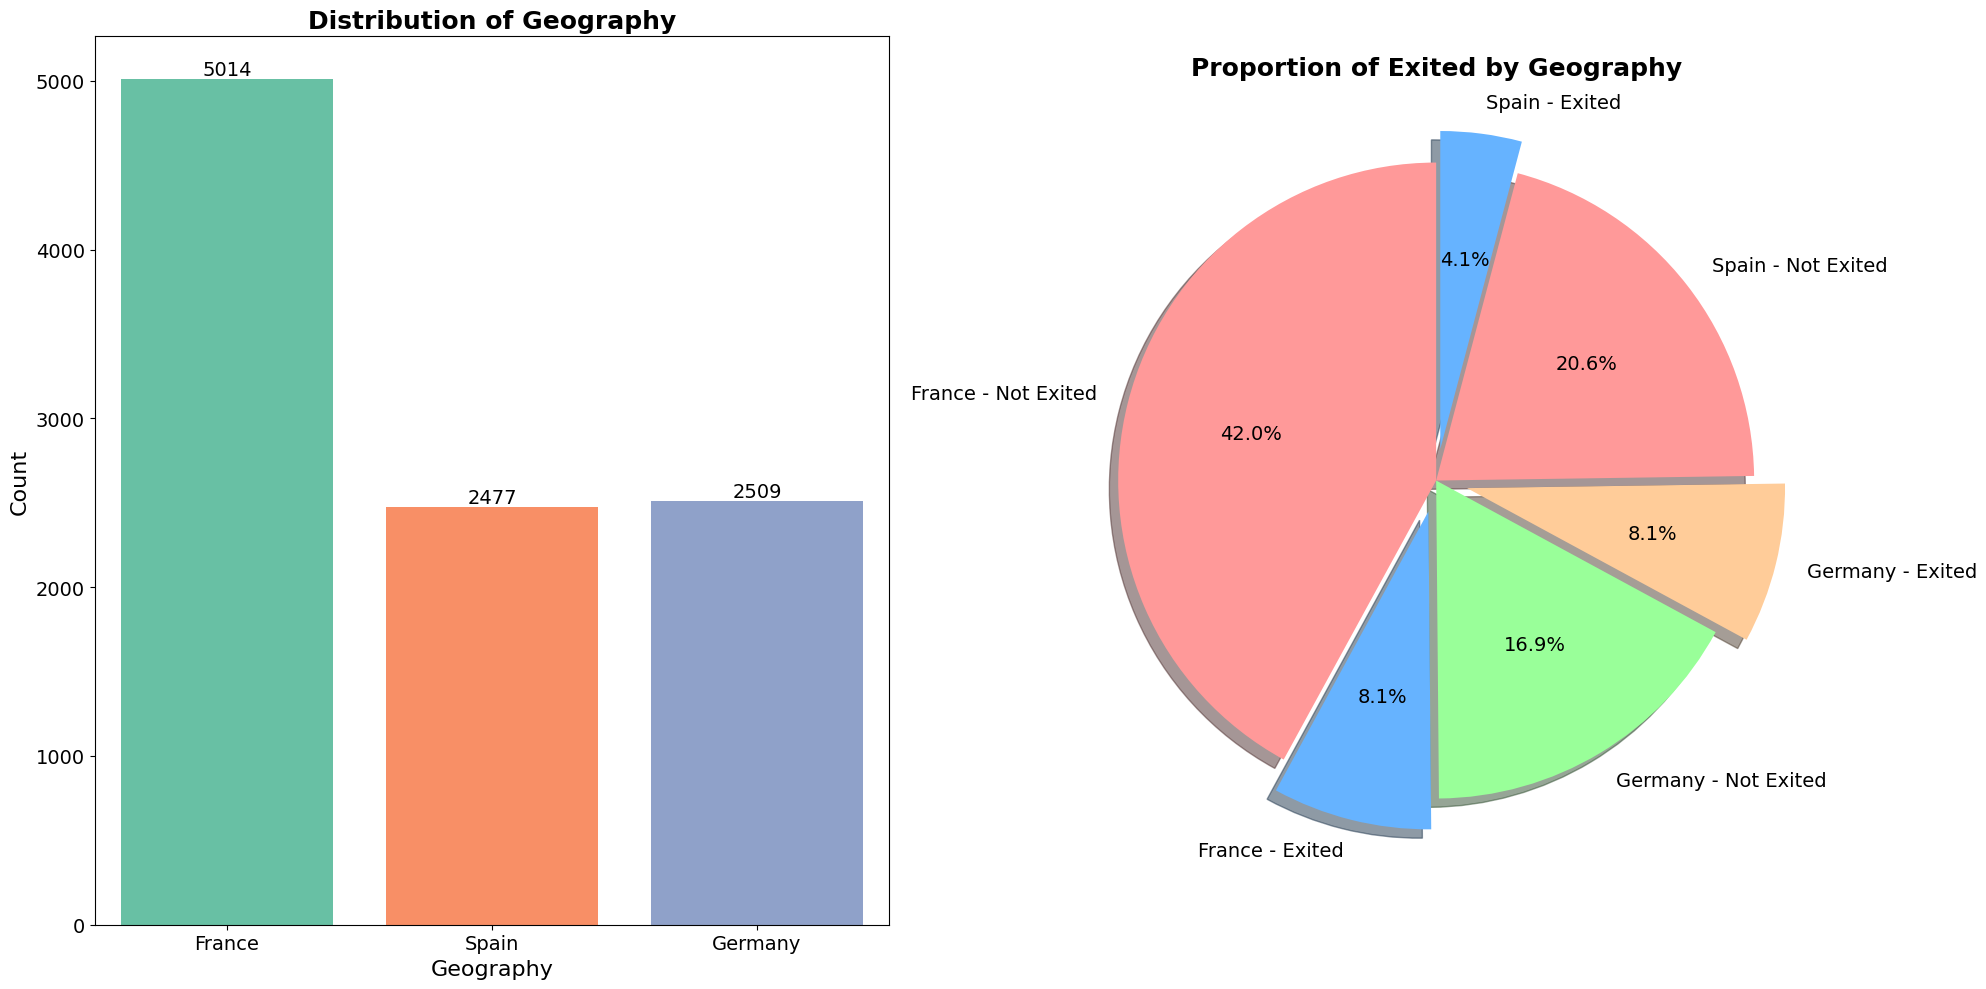

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Count plot for the 'Geography' variable
sns.countplot(x=df['Geography'], data=df, palette='Set2', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=14)
ax[0].set_title('Distribution of Geography', fontsize=18, fontweight='bold')
ax[0].set_xlabel('Geography', fontsize=16)
ax[0].set_ylabel('Count', fontsize=16)
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)

# Pie chart for 'Exited' proportions segmented by 'Geography'
exited_counts = df.groupby('Geography')['Exited'].value_counts().unstack()

# Flatten the counts and generate labels
values = exited_counts.values.flatten()
labels = [f'{geo} - {"Exited" if ex == 1 else "Not Exited"}'
          for geo in exited_counts.index for ex in exited_counts.columns]

# Set explode to highlight the 'Exited' segments
explode = [0.1 if ex == 1 else 0 for _ in exited_counts.index for ex in exited_counts.columns]

ax[1].pie(values, 
          labels=labels,
          explode=explode,
          autopct='%1.1f%%',
          shadow=True,
          colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
          startangle=90,
          textprops={'fontsize': 14})
ax[1].set_title('Proportion of Exited by Geography', fontsize=18, fontweight='bold')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


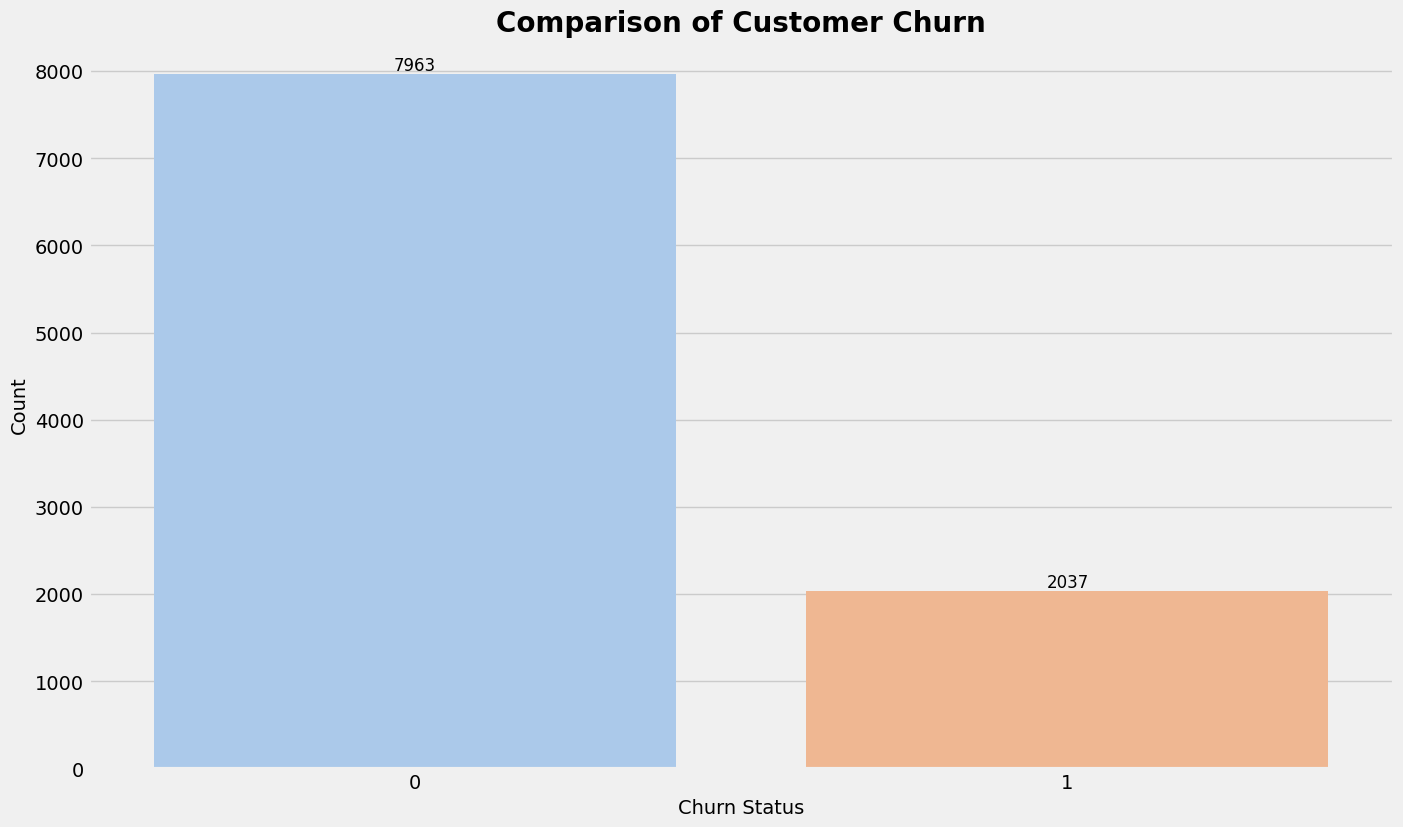

In [25]:
import matplotlib.pyplot as plt  # Importing matplotlib for plotting
import seaborn as sns  # Importing seaborn for advanced visualizations

# Set the default figure size and use a clean style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create a countplot to visualize the distribution of the 'Exited' variable (Customer Churn)
ax = sns.countplot(x='Exited', data=df, palette='pastel')

# Configure the title and axis labels
plt.title('Comparison of Customer Churn', fontweight='bold', fontsize=20)
plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Annotate each bar with its count value
for container in ax.containers:
    ax.bar_label(container, fmt='%d', color='black', fontsize=12)

# Render and display the plot
plt.show()


In [26]:
df.to_csv('notebook/data/preprocessed_Churn_Modelling.csv', index=False)